## 1.Importing the Breast Cancer dataset

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# Load the Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape) # Print the data dimensions
print(data.feature_names) # Print the feature names
print(data.target_names) # Print the target names
print(y) # Print the target labels
print(y.shape) # Print the target shape

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 

## 2.Data Preprocessing

In [2]:
# X = data.data[:, [20, 1, 22, 27]]  # Selected features based on importance
X = data.data[:, [0, 1, 2, 3]]
y = data.target

alpha = X[:, :3] * X[:, 1:] # In each sample, a parameter is calculated u
X = np.append(X, alpha, axis=1) # In the dimension of axis=1, add the data va
print(X.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True) # Divide the dataset into training and test sets

print(X_train.shape)                                                                                   # Print the data type of the samples in the training set
print(X_test.shape)                                                                                    # Print the data type of the samples in the test set

(569, 7)
(455, 7)
(114, 7)


## 3.Data Visualisation

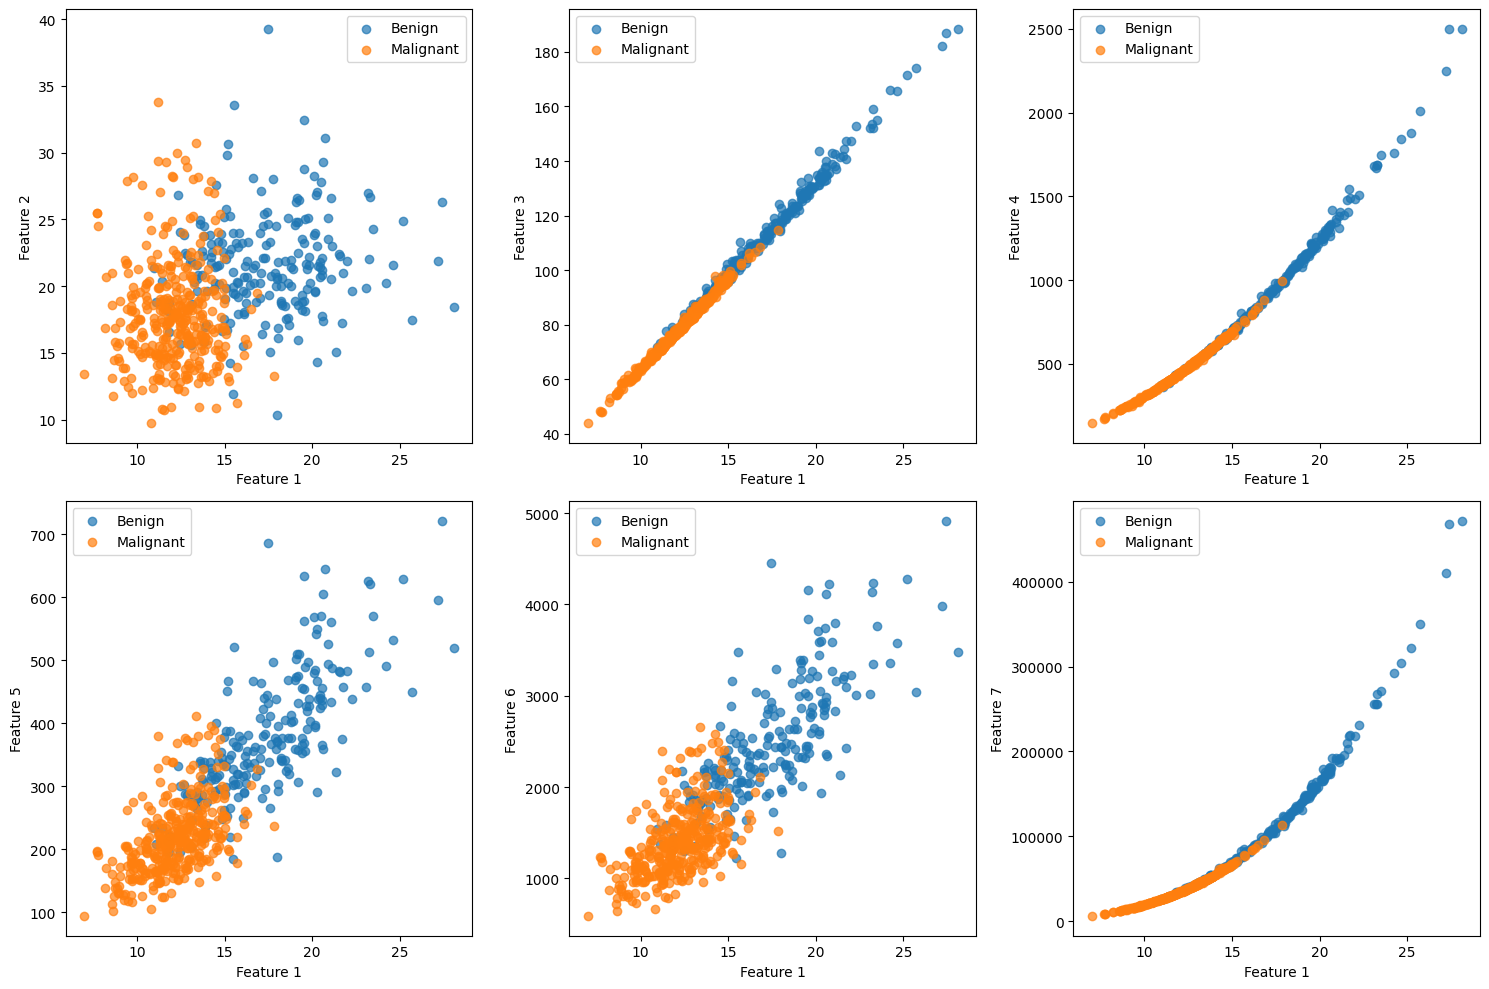

In [3]:
import matplotlib.pyplot as plt

# Visualize pairwise relationships between the selected features
plt.figure(figsize=(15, 10))
plot_number = 1
num_features = X.shape[1]

for i in range(num_features):
    for j in range(i + 1, num_features):
        if plot_number <= 6:  # Ensure plot_number doesn't exceed available subplots
            plt.subplot(2, 3, plot_number)  # Use 2 rows and 3 columns for 6 plots
            plt.scatter(X[:, i][y == 0], X[:, j][y == 0], alpha=0.7, label='Benign')
            plt.scatter(X[:, i][y == 1], X[:, j][y == 1], alpha=0.7, label='Malignant')
            plt.xlabel(f"Feature {i+1}")
            plt.ylabel(f"Feature {j+1}")
            plt.legend()
            plot_number += 1

plt.tight_layout()
plt.show()

## 4.Building Encoder

D:\anaconda3\envs\QCNN\lib\site-packages\mindquantum\simulator\__init__.py:17: UserWarning: Unable import mqvector gpu backend due to: cannot import name '_mq_vector_gpu' from partially initialized module 'mindquantum' (most likely due to a circular import) (D:\anaconda3\envs\QCNN\lib\site-packages\mindquantum\__init__.py)
  from .available_simulator import SUPPORTED_SIMULATOR


                                 Circuit Summary                                 
╭──────────────────────┬────────────────────────────────────────────────────────╮
│ Info                 │ value                                                  │
├──────────────────────┼────────────────────────────────────────────────────────┤
│ Number of qubit      │ 4                                                      │
├──────────────────────┼────────────────────────────────────────────────────────┤
│ Total number of gate │ 17                                                     │
│ Barrier              │ 0                                                      │
│ Noise Channel        │ 0                                                      │
│ Measurement          │ 0                                                      │
├──────────────────────┼────────────────────────────────────────────────────────┤
│ Parameter gate       │ 7                                                      │
│ 7 ansatz parameters  │ alpha0, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6 │
╰──────────────────────┴────────────────────────────────────────────────────────╯

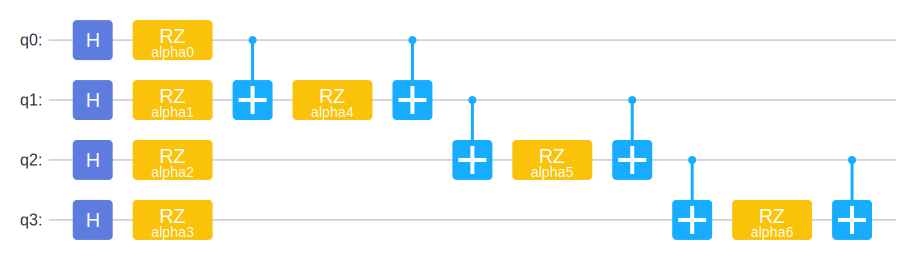

In [4]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.circuit import UN
from mindquantum.core.gates import H, X, RZ
from mindquantum.core.parameterresolver import PRGenerator

# Encoding Method used is IQP encoding (Instantaneous Quantum Polynomial encoding).
prg = PRGenerator('alpha')
encoder = Circuit()
encoder += UN(H, 4)                                  # H gates act on every 1 qubit
for i in range(4):                                   # i = 0, 1, 2, 3
    encoder += RZ(prg.new()).on(i)                   # The RZ(alpha_i) gate acts on the ith qubit
for j in range(3):                                   # j = 0, 1, 2
    encoder += X.on(j+1, j)                          # The X gate acts on the j+1th qubit and is controlled by the jth qubit
    encoder += RZ(prg.new()).on(j+1)                 # The RZ(alpha_{j+4}) gate acts on the 0th qubit
    encoder += X.on(j+1, j)                          # The X gate acts on the j+1th qubit and is controlled by the jth qubit

encoder = encoder.no_grad()                          # As the first layer of the entire quantum neural network, the Encoder does not need to take the derivative of the gradient in the encoding circuit, so no_grad() is added.
encoder.summary()                                    # Summary Encoder
encoder.svg()

## 5.Building Ansatz

                                       Circuit Summary                                       
╭──────────────────────┬────────────────────────────────────────────────────────────────────╮
│ Info                 │ value                                                              │
├──────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Number of qubit      │ 4                                                                  │
├──────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Total number of gate │ 25                                                                 │
│ Barrier              │ 0                                                                  │
│ Noise Channel        │ 0                                                                  │
│ Measurement          │ 0                                                                  │
├──────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Parameter gate       │ 16                                                                 │
│ 16 ansatz parameters │ d0_n0_0, d0_n1_0, d0_n2_0, d0_n3_0, d1_n0_0, d1_n1_0, d1_n2_0,     │
│                      │ d1_n3_0, d2_n0_0, d2_n1_0...                                       │
╰──────────────────────┴────────────────────────────────────────────────────────────────────╯

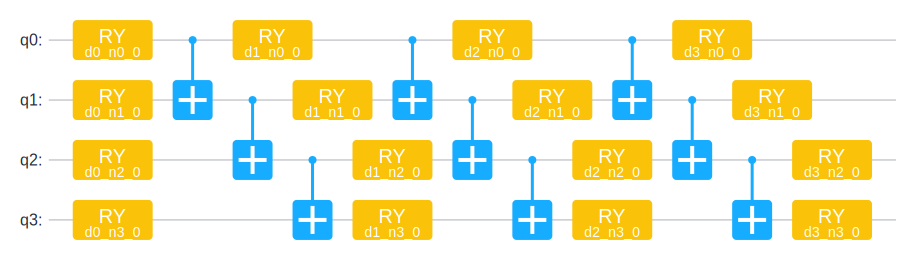

In [5]:
from mindquantum.algorithm.nisq import HardwareEfficientAnsatz                                      # Import HardwareEfficientAnsatz
from mindquantum.core.gates import RY                                                               # Import quantum gate RY

ansatz = HardwareEfficientAnsatz(4, single_rot_gate_seq=[RY], entangle_gate=X, depth=3).circuit     # Building Ansatz with HardwareEfficientAnsatz
ansatz.summary()                                                                                    # Summary Ansatz
ansatz.svg()

## 6. Complete Circuit

                                       Circuit Summary                                       
╭──────────────────────┬────────────────────────────────────────────────────────────────────╮
│ Info                 │ value                                                              │
├──────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Number of qubit      │ 4                                                                  │
├──────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Total number of gate │ 42                                                                 │
│ Barrier              │ 0                                                                  │
│ Noise Channel        │ 0                                                                  │
│ Measurement          │ 0                                                                  │
├──────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Parameter gate       │ 23                                                                 │
│ 7 encoder parameters │ alpha0, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6             │
│ 16 ansatz parameters │ d0_n0_0, d0_n1_0, d0_n2_0, d0_n3_0, d1_n0_0, d1_n1_0, d1_n2_0,     │
│                      │ d1_n3_0, d2_n0_0, d2_n1_0...                                       │
╰──────────────────────┴────────────────────────────────────────────────────────────────────╯

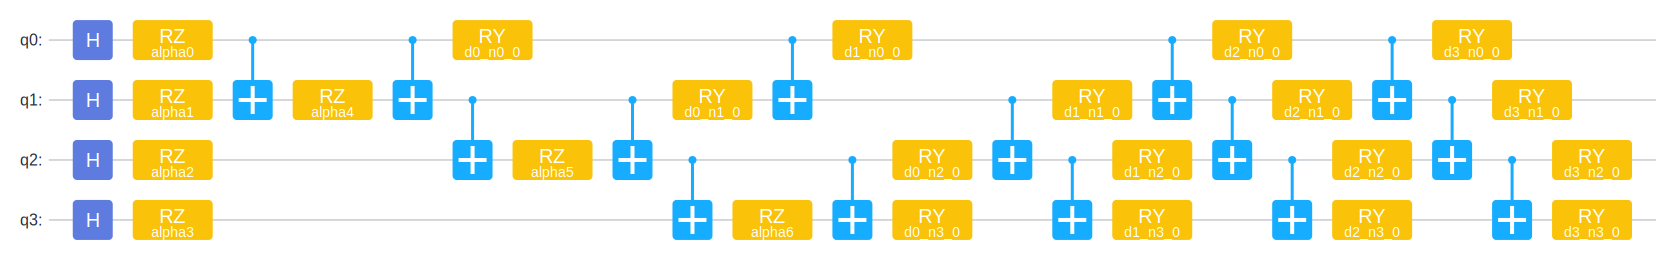

In [6]:
circuit = encoder.as_encoder() + ansatz.as_ansatz()                   # The complete quantum circuit consists of Encoder and Ansatz
circuit.summary()
circuit.svg()

## 7.Building the Hamiltonian

In [7]:
from mindquantum.core.operators import QubitOperator                     # Import the QubitOperator module for constructing the Pauli operator
from mindquantum.core.operators import Hamiltonian                       # Import the Hamiltonian module for building the Hamiltonian

hams = [Hamiltonian(QubitOperator(f'Z{i}')) for i in [2, 3]]   # Perform the Pauli Z operator measurement on the 2nd and 3rd qubits respectively, and set the coefficients to 1 to construct the corresponding Hamiltonian
for h in hams:
    print(h)

1 [Z2]
1 [Z3]


## 8.Building a Quantum Neural Network

In [8]:
import mindspore as ms                                            # Import the mindspore library and abbreviated as ms
from mindquantum.framework import MQLayer                         # Import MQLayer
from mindquantum.simulator import Simulator

ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")
ms.set_seed(1)                                                    # Set the seed for generating random numbers
sim = Simulator('mqvector', circuit.n_qubits)
grad_ops = sim.get_expectation_with_grad(hams,
                                         circuit,
                                         parallel_worker=5)
QuantumNet = MQLayer(grad_ops)                                    # Building a quantum neural network
QuantumNet

MQLayer<
  (evolution): MQOps<4 qubits mqvector VQA Operator>
  >

## 9.Training

In [9]:
from mindspore.nn import SoftmaxCrossEntropyWithLogits                         # Import the SoftmaxCrossEntropyWithLogits module to define the loss function
from mindspore.nn import Adam                                                  # Import the Adam module, which is used to define optimization parameters.
from mindspore.train import Accuracy, Model, LossMonitor                       # Import the Accuracy module, which is used to evaluate the prediction accuracy respectively.
import mindspore as ms
from mindspore.dataset import NumpySlicesDataset                               # Import the NumpySlicesDataset module for creating datasets that the model can recognize

loss = SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')            # The loss function is defined by SoftmaxCrossEntropyWithLogits, sparse=True indicates that the specified label uses a sparse format, and reduction='mean' indicates that the dimensionality reduction method of the loss function is averaging
opti = Adam(QuantumNet.trainable_params(), learning_rate=0.01)                  # The parameters in Ansatz are optimized by the Adam optimizer. What needs to be optimized are the trainable parameters in Quantumnet, and the learning rate is set to 0.1

model = Model(QuantumNet, loss, opti, metrics={'Acc': Accuracy()})             # Build a model: Combine the quantum machine learning layer built by MindSpore Quantum and the operators of MindSpore to form a larger machine learning network

train_loader = NumpySlicesDataset({'features': X_train, 'labels': y_train}, shuffle=False).batch(20) # Create a dataset of training samples by NumpySlicesDataset, shuffle=False means not to shuffle the data, batch(5) means that the training set has 5 sample points per batch
test_loader = NumpySlicesDataset({'features': X_test, 'labels': y_test}).batch(20)                   # Create a data set of test samples by NumpySlicesDataset, batch(5) means that there are 5 sample points in each batch of the test set

class StepAcc(ms.Callback):                                                        # Define a callback function about the accuracy of each step
    def __init__(self, model, test_loader):
        self.model = model
        self.test_loader = test_loader
        self.acc = []

    def on_train_step_end(self, run_context):
        self.acc.append(self.model.eval(self.test_loader, dataset_sink_mode=False)['Acc'])

monitor = LossMonitor(10)                                                       # Monitor the loss during training and print the loss value every 16 steps
acc = StepAcc(model, test_loader)                                               # Calculate the accuracy of predictions using the established model and test samples
model.train(30, train_loader, callbacks=[monitor, acc], dataset_sink_mode=False)# Train the model 20 times


epoch: 1 step: 10, loss is 0.6882725358009338
epoch: 1 step: 20, loss is 0.6956761479377747
epoch: 2 step: 7, loss is 0.6926986575126648
epoch: 2 step: 17, loss is 0.6820998191833496
epoch: 3 step: 4, loss is 0.6539635062217712
epoch: 3 step: 14, loss is 0.6838644742965698
epoch: 4 step: 1, loss is 0.6842727661132812
epoch: 4 step: 11, loss is 0.6968280673027039
epoch: 4 step: 21, loss is 0.7045088410377502
epoch: 5 step: 8, loss is 0.69414222240448
epoch: 5 step: 18, loss is 0.6607978940010071
epoch: 6 step: 5, loss is 0.685576319694519
epoch: 6 step: 15, loss is 0.6340349316596985
epoch: 7 step: 2, loss is 0.6542567014694214
epoch: 7 step: 12, loss is 0.7113847732543945
epoch: 7 step: 22, loss is 0.6504665613174438
epoch: 8 step: 9, loss is 0.6719468235969543
epoch: 8 step: 19, loss is 0.7443233728408813
epoch: 9 step: 6, loss is 0.670249342918396
epoch: 9 step: 16, loss is 0.679199755191803
epoch: 10 step: 3, loss is 0.741165280342102
epoch: 10 step: 13, loss is 0.7090638875961304
e

## 10.Accuracy During Training

Text(0, 0.5, 'Accuracy')

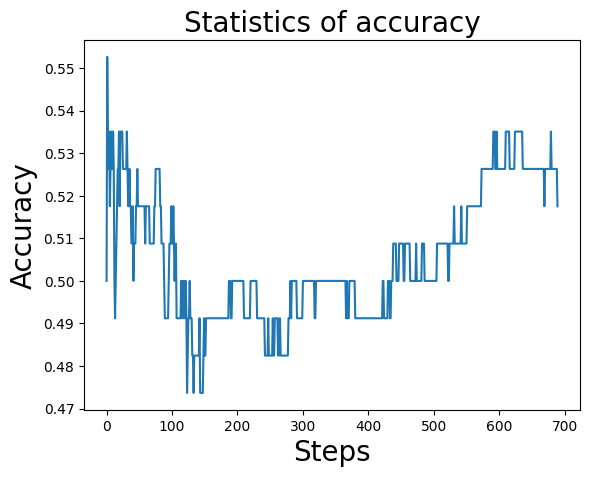

In [10]:
import matplotlib.pyplot as plt   
plt.plot(acc.acc)
plt.title('Statistics of accuracy', fontsize=20)
plt.xlabel('Steps', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

## 11. Testing the Model

In [11]:
from mindspore import ops                                                       # Import the ops module

predict = np.argmax(ops.Softmax()(model.predict(ms.Tensor(X_test))), axis=1)    # Using the established model and test samples, get the classification predicted by the test samples
correct = model.eval(test_loader, dataset_sink_mode=False)                      # Calculate the prediction accuracy of the trained model applied to the test sample

print("Predicted classification result: ", predict)                             # For test samples, print the predicted classification result
print("Actual classification result: ", y_test)                                 # For test samples, print the actual classification result

print(correct)                                                                  # Print the accuracy of model predictions


Predicted classification result:  [1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0
 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1
 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1
 0 1 0]
Actual classification result:  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]
{'Acc': 0.5175438596491229}


# CLASSICAL MODEL

## 1: Importing Necessary Libraries

In [12]:
# Import TensorFlow and other necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 2: Data Preprocessing

In [13]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit a dense model (optional for classical NN)
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)


## 3: Building the CNN Model

In [14]:
# Define the CNN model
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output and add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Since it's a binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


## 4: Training the CNN Model

In [15]:
# Summary of the model
model.summary()

# Train the CNN model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=16)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 64)                2

## 5: Evaluating the CNN Model

4/4 - 0s - loss: 0.0499 - accuracy: 0.9825 - 21ms/epoch - 5ms/step
Test accuracy: 0.9824561476707458


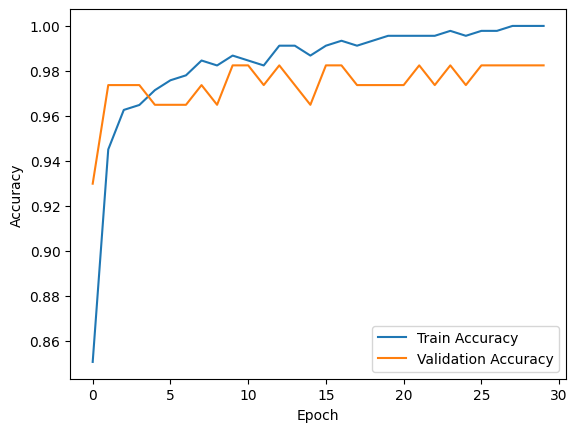

In [16]:
# Evaluate the CNN model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()